# DNA Methylation P Values

In [1]:
import pandas as pd
from scipy.stats import ttest_ind_from_stats
import math
from IPython.display import display, HTML

In [2]:
#https://www.graphpad.com/quickcalcs/ttest2/

In [3]:
data_path = "data/P_Value_Calcuate/"
result_path = "Result/P_Value_Calcuate/"

In [4]:
df = pd.read_csv(data_path + "P_value_calculation_from_mean_and_SD.csv")

In [5]:
columns1 = ['one','Average1','SD1']
columns2 = ['two','Average2','SD2']
columns3 = ['three','Average3','SD3']
columns4 = ['four','Average4','SD4']
columns5 = ['five','Average5','SD5']
columns6 = ['six','Average6','SD6']
columns7 = ['seven','Average7','SD7']
columns8 = ['eight','Average8','SD8']

In [6]:
def get_p_values(Experiment,cnames):
    n = 3
    p_values=['p-values','NA']
    for i in range(2,5):
        m1 = float(Experiment[cnames[1]][1])
        std1 = float(Experiment[cnames[2]][1])
        m2 = float(Experiment[cnames[1]][i])
        std2 = float(Experiment[cnames[2]][i])
        #print("Air : ", "Mean : ", m1 , "SD : " , std1, "N : ", n )
        #print(Experiment[cnames[0]][i], "Mean : ", m2 , "SD : " , std2, "N : ", n  )
        tstat, pvalue = ttest_ind_from_stats(m1, std1, n, m2, std2, n)
        #print("P-Value : ", pvalue)
        p_values.append(round(pvalue,4))
        #print('*'*20)
    Experiment['p_vales']= p_values
    return Experiment.copy()


def get_experiment(data,cnames,result_path,filename):
    HeatMapPvalues = {}
    for i in range(0, len(data), 5):
        Experiment = data.loc[i:i+4,cnames].copy().reset_index(drop = True)
        #print("Data : ")
        #display(Experiment)
        #print("*"*20)
        Result = get_p_values(Experiment,cnames)
        #display(Result)
        geneName = Result[cnames[1]].iloc[0].split('-')[0]
        geneValues = Result[cnames[1]][2:5]
        HeatMapPvalues[geneName] = geneValues
    return HeatMapPvalues

In [7]:
H1 = get_experiment(df,columns1,result_path,"df-part-1")
H3 = get_experiment(df,columns3,result_path,"df-part-3")
H5 = get_experiment(df,columns5,result_path,"df-part-5")
H7 = get_experiment(df,columns7,result_path,"df-part-7")

In [8]:
dfH1 = pd.DataFrame(H1)
dfH3 = pd.DataFrame(H3)
dfH5 = pd.DataFrame(H5)
dfH7 = pd.DataFrame(H7)

In [9]:
dfH1

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,0.99,0.93,0.93,0.97,1.08,1.04,1.06,1.07,1.06,1.11,1.08,0.99,1.02,1.08
3,1.05,0.94,2.26,0.83,0.99,0.94,0.95,0.94,0.97,0.93,1.03,0.93,0.91,1.01
4,1.01,0.77,5.05,0.85,1.09,0.86,1.20,0.88,0.89,0.81,0.96,0.93,1.08,1.06


In [10]:
dfH3

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,0.83,0.58,2.17,0.81,0.89,0.81,0.93,0.72,0.77,0.85,0.89,0.79,0.87,0.98
3,1.65,0.85,309.53,0.78,0.97,0.99,1.11,0.87,0.95,0.89,0.93,0.72,0.92,0.94
4,2.57,0.56,1496.78,0.72,0.94,0.92,1.63,0.67,0.73,0.71,0.77,0.47,0.85,0.98


In [11]:
dfH5

,AHRR,ALU RT,CYP1A1,DNMT1,DNMT3A,DNMT3B,GPX3,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,1.42,0.80,69.46,0.93,0.95,0.93,1.27,0.81,0.83,0.84,0.82,0.69,0.89,1.03
3,2.28,0.68,887.36,0.85,0.83,0.75,1.70,0.66,0.70,0.71,0.70,0.45,0.78,0.85
4,4.18,0.60,5465.07,0.89,0.88,0.86,2.26,0.57,0.56,0.56,0.57,0.35,0.82,0.78


In [12]:
dfH7

,AHRR,Alu,CY1P1A1,DNMT1,DNMT3a,DNMT3b,GPX3,HS LINE 5UTR,HSLINE 3 UTR,ORF1,ORF2,TET1,TET2,TET3
2,7.31,1.21,1487.71,0.97,1.04,1.09,0.99,1.01,1.08,1.18,1.18,1.44,0.98,0.92
3,16.16,0.87,9406.97,0.90,0.92,0.83,1.19,0.85,0.84,0.94,0.91,0.69,0.86,0.86
4,12.07,0.76,7993.70,0.69,0.64,0.52,1.70,0.58,0.63,0.67,0.67,0.21,0.64,0.80


In [13]:
#dfH1 = dfH1.drop([0]).copy()
#dfH3 = dfH3.drop([0]).copy()
#dfH5 = dfH5.drop([0]).copy()
#dfH7 = dfH7.drop([0]).copy()

In [14]:
df1 = dfH1.transpose()
df3 = dfH3.transpose()
df5 = dfH5.transpose()
df7 = dfH7.transpose()

In [15]:
df1.columns = ['4L/min','1L/min','0.5L/min']
df3.columns = ['4L/min','1L/min','0.5L/min']
df5.columns = ['4L/min','1L/min','0.5L/min']
df7.columns = ['4L/min','1L/min','0.5L/min']

In [16]:
df1['4L/min'] = pd.to_numeric(df1['4L/min'])
df1['1L/min'] = pd.to_numeric(df1['1L/min'])
df1['0.5L/min'] = pd.to_numeric(df1['0.5L/min'])



df3['4L/min'] = pd.to_numeric(df3['4L/min'])
df3['1L/min'] = pd.to_numeric(df3['1L/min'])
df3['0.5L/min'] = pd.to_numeric(df3['0.5L/min'])



df5['4L/min'] = pd.to_numeric(df5['4L/min'])
df5['1L/min'] = pd.to_numeric(df5['1L/min'])
df5['0.5L/min'] = pd.to_numeric(df5['0.5L/min'])



df7['4L/min'] = pd.to_numeric(df7['4L/min'])
df7['1L/min'] = pd.to_numeric(df7['1L/min'])
df7['0.5L/min'] = pd.to_numeric(df7['0.5L/min'])

In [17]:
df1.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [18]:
df3.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [19]:
df5.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [20]:
df7.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [21]:
df1 = df1.apply(lambda x: [y if y <=5 else 5 for y in x])
df3 = df3.apply(lambda x: [y if y <=5 else 5 for y in x])
df5 = df5.apply(lambda x: [y if y <=5 else 5 for y in x])
df7 = df7.apply(lambda x: [y if y <=5 else 5 for y in x])

In [22]:
df1

,4L/min,1L/min,0.5L/min
AHRR,0.99,1.05,1.01
ALU RT,0.93,0.94,0.77
CYP1A1,0.93,2.26,5.00
DNMT1,0.97,0.83,0.85
DNMT3A,1.08,0.99,1.09
DNMT3B,1.04,0.94,0.86
GPX3,1.06,0.95,1.20
HS 3 UTR,1.07,0.94,0.88
HS 5 UTR,1.06,0.97,0.89
ORF1,1.11,0.93,0.81


In [23]:
df3

,4L/min,1L/min,0.5L/min
AHRR,0.83,1.65,2.57
ALU RT,0.58,0.85,0.56
CYP1A1,2.17,5.00,5.00
DNMT1,0.81,0.78,0.72
DNMT3A,0.89,0.97,0.94
DNMT3B,0.81,0.99,0.92
GPX3,0.93,1.11,1.63
HS 3 UTR,0.72,0.87,0.67
HS 5 UTR,0.77,0.95,0.73
ORF1,0.85,0.89,0.71


In [24]:
df5

,4L/min,1L/min,0.5L/min
AHRR,1.42,2.28,4.18
ALU RT,0.80,0.68,0.60
CYP1A1,5.00,5.00,5.00
DNMT1,0.93,0.85,0.89
DNMT3A,0.95,0.83,0.88
DNMT3B,0.93,0.75,0.86
GPX3,1.27,1.70,2.26
HS 3 UTR,0.81,0.66,0.57
HS 5 UTR,0.83,0.70,0.56
ORF1,0.84,0.71,0.56


In [25]:
df7

,4L/min,1L/min,0.5L/min
AHRR,5.00,5.00,5.00
Alu,1.21,0.87,0.76
CY1P1A1,5.00,5.00,5.00
DNMT1,0.97,0.90,0.69
DNMT3a,1.04,0.92,0.64
DNMT3b,1.09,0.83,0.52
GPX3,0.99,1.19,1.70
HS LINE 5UTR,1.01,0.85,0.58
HSLINE 3 UTR,1.08,0.84,0.63
ORF1,1.18,0.94,0.67


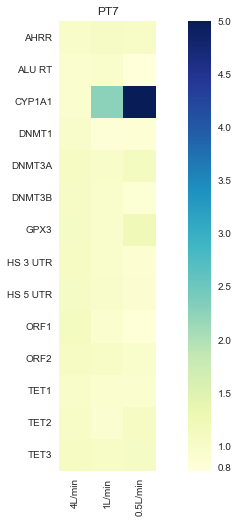

In [35]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df1,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("PT7")
fig.savefig("PT7.png")

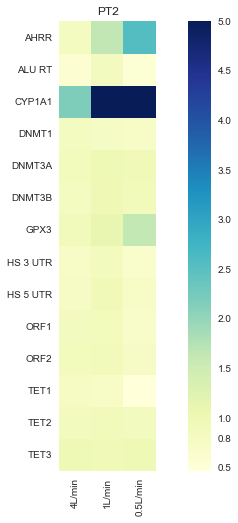

In [36]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df3,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("PT2")
fig.savefig("PT2.png")

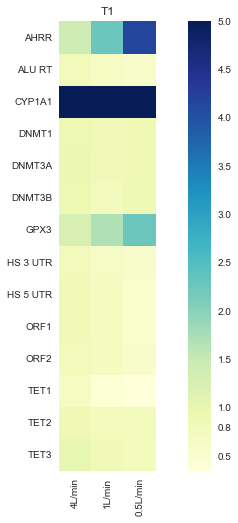

In [37]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df5,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("T1")
fig.savefig("T1.png")

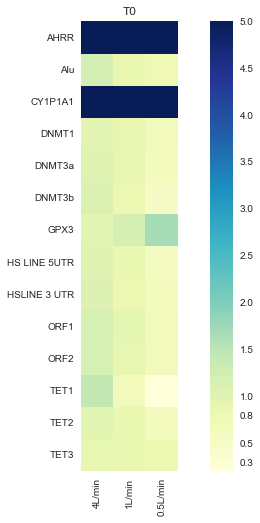

In [38]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df7,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("T0")
fig.savefig("T0.png")